## End-to-End Validation Demo

This notebook implements an independent verification of the results from `Sorcha` on a one month LSST simulation for two objects.

The reference ephemerides for these objects (as CSV files) come from JPL Horizons queries. The reference query uses dates from 2023-10-08 UT to 2023-11-08, with one minute timesteps, for the objects 2011 OB60 (a TNO) and 2010 TU149 (MBA), as seen from the X05 observatory.

In [1]:
import numpy as np
import astropy.table as tb
import pandas as pd
import sqlite3

In [2]:
import matplotlib.pyplot as pl

In [3]:
#read pointing database and restrict to our time baseline
con = sqlite3.connect('../../src/sorcha/data/demo/baseline_v2.0_1yr.db')

pointing = pd.read_sql("SELECT observationId, observationStartMJD as observationStartMJD_TAI, visitTime, visitExposureTime, filter, seeingFwhmGeom as seeingFwhmGeom_arcsec, seeingFwhmEff as seeingFwhmEff_arcsec, fiveSigmaDepth as fieldFiveSigmaDepth_mag , fieldRA as fieldRA_deg, fieldDec as fieldDec_deg, rotSkyPos as fieldRotSkyPos_deg FROM observations order by observationId", con=con, )

pointing

,observationId,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg
0,0,60218.001806,34.0,30.0,y,0.667370,0.748626,22.370557,310.024480,-60.812928,62.750775
1,1,60218.002254,34.0,30.0,y,0.678175,0.761770,22.338327,310.601871,-63.561425,61.084250
2,2,60218.002703,34.0,30.0,y,0.690895,0.777245,22.295487,311.292611,-66.317774,60.726189
3,3,60218.003152,34.0,30.0,y,1.657640,1.953333,21.270421,312.140731,-69.082666,60.656781
4,4,60218.003624,34.0,30.0,y,1.713416,2.021188,21.205276,304.170163,-73.375442,49.095537
...,...,...,...,...,...,...,...,...,...,...,...
216228,216228,60583.103691,34.0,30.0,g,0.988866,1.139739,24.422508,8.496364,-29.615770,86.518379
216229,216229,60583.104140,34.0,30.0,g,1.003682,1.157764,24.397505,11.808603,-29.898183,86.777460
216230,216230,60583.104587,34.0,30.0,g,1.014421,1.170829,24.374331,13.363397,-27.303043,91.147723
216231,216231,60583.105032,34.0,30.0,g,1.026912,1.186025,24.343872,14.847339,-24.711444,94.995634


In [4]:
import astropy.time as ti 
pointing = pointing[pointing['observationStartMJD_TAI'] > 60225]
pointing = pointing[pointing['observationStartMJD_TAI'] < 60255]
pointing['MJD_TDB'] = ti.Time(pointing['observationStartMJD_TAI'] + pointing['visitTime']/(2*86400.0), format='mjd', scale='tai').tdb.mjd
pointing

,observationId,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg,MJD_TDB
5398,5398,60225.000341,34.0,30.0,r,0.693873,0.780867,24.336680,325.777117,-40.076878,110.946937,60225.000910
5399,5399,60225.000800,34.0,30.0,r,0.696867,0.784510,24.335598,325.609267,-43.105406,102.956598,60225.001369
5400,5400,60225.001260,34.0,30.0,r,0.684560,0.769538,24.347565,332.965064,-46.169394,107.885215,60225.001829
5401,5401,60225.001709,34.0,30.0,r,0.689428,0.775460,24.340440,333.038252,-49.111447,102.767992,60225.002278
5402,5402,60225.002157,34.0,30.0,r,0.695373,0.782692,24.327080,333.059351,-52.057748,98.135653,60225.002726
...,...,...,...,...,...,...,...,...,...,...,...,...
24474,24474,60251.366258,34.0,30.0,i,0.699315,0.787488,23.270283,81.912982,-27.019050,234.493172,60251.366827
24475,24475,60251.366706,34.0,30.0,i,0.706234,0.795905,23.224385,79.796144,-24.525717,228.806467,60251.367276
24476,24476,60251.367202,34.0,30.0,i,0.702517,0.791383,23.199502,83.540274,-20.909984,218.028671,60251.367771
24477,24477,60251.367658,34.0,30.0,i,0.745439,0.843600,23.088602,78.410579,-19.065750,218.537314,60251.368227


Now we have our reference pointings, on to the objects

In [5]:
# read our objects
obj = {}
obj['2011 OB60'] = tb.Table.read('2011ob60.txt', format='csv')
obj['2010 TU149'] = tb.Table.read('2010tu149.txt', format='csv')
for i in obj:
    obj[i]['MJD'] = ti.Time(obj[i]['JDUT'],format='jd', scale='utc').tdb.mjd

In [6]:
obj['2010 TU149']

JDUT,col1,_1,RA,DEC,APmag,S-brt,r,rdot,delta,deldot,S-O-T,/r,S-T-O,O-P-T,PsAng,PsAMV,Sky_motion,Sky_mot_PA,RelVel-ANG,Lun_Sky_Brt,sky_SNR,_2,MJD
float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str5,str7,int64,float64
2460225.5,A,--,19.7210206,4.856703608,21.416,6.527,1.696279513621,-20.6503447,0.69968470063905,-22.6844214,173.2633,/L,3.9648,2.49,276.388,248.881,1.6304974,246.66601,-58.70543,n.a.,n.a.,--,60225.00080072161
2460225.500694444,A,--,19.720603299,4.856523883,21.416,6.527,1.696271230638,-20.6504168,0.69967560204437,-22.6836065,173.2643,/L,3.9642,2.4896,276.393,248.881,1.6307293,246.66868,-58.70123,n.a.,n.a.,--,60225.00149516555
2460225.501388889,A,--,19.72018593,4.856344153,21.416,6.527,1.696262947626,-20.6504889,0.69966650377801,-22.6827842,173.2653,/L,3.9637,2.4892,276.397,248.881,1.6309611,246.67133,-58.69703,n.a.,n.a.,--,60225.002189610415
2460225.502083333,A,--,19.719768494,4.856164415,21.416,6.527,1.696254664586,-20.6505609,0.69965740584296,-22.6819545,173.2663,/L,3.9631,2.4888,276.402,248.881,1.6311926,246.67398,-58.69282,n.a.,n.a.,--,60225.00288405482
2460225.502777778,A,--,19.71935099,4.855984672,21.415,6.527,1.696246381516,-20.650633,0.69964830824217,-22.6811174,173.2673,/L,3.9625,2.4884,276.407,248.881,1.6314239,246.67662,-58.6886,n.a.,n.a.,--,60225.00357849969
2460225.503472222,A,--,19.718933419,4.855804922,21.415,6.527,1.696238098417,-20.6507051,0.69963921097862,-22.6802729,173.2683,/L,3.962,2.4879,276.411,248.881,1.6316551,246.67926,-58.68438,n.a.,n.a.,--,60225.004272943625
2460225.504166667,A,--,19.71851578,4.855625166,21.415,6.526,1.69622981529,-20.6507771,0.69963011405528,-22.679421,173.2693,/L,3.9614,2.4875,276.416,248.881,1.631886,246.68188,-58.68016,n.a.,n.a.,--,60225.00496738849
2460225.504861111,A,--,19.718098075,4.855445404,21.415,6.526,1.696221532134,-20.6508492,0.69962101747509,-22.6785618,173.2703,/L,3.9608,2.4871,276.421,248.881,1.6321167,246.68451,-58.67593,n.a.,n.a.,--,60225.00566183243
2460225.505555556,A,--,19.717680302,4.855265635,21.415,6.526,1.696213248949,-20.6509213,0.69961192124103,-22.6776952,173.2713,/L,3.9603,2.4867,276.425,248.881,1.6323472,246.68712,-58.67169,n.a.,n.a.,--,60225.006356277765


Because of the very dense reference JPL ephemerides, and because we're using an asteroid and a TNO, I'm assuming that the functions are ~linear in the <1 minute timescale needed for the interpolation (Taylor's theorem is our friend here). I think this also means that I don't have to bother with light time correction - linearity once again.

In [7]:
interpolated = {}
for i in obj:
    interpolated[i] = tb.Table()
    for j in pointing.keys():
        interpolated[i][j] = pointing[j]
    interpolated[i]['RA_INTERP'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['RA'])
    interpolated[i]['DEC_INTERP'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['DEC'])
    interpolated[i]['delta'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['delta'])
    interpolated[i]['r'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['r'])
    interpolated[i]['S-T-O'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['S-T-O'])
    interpolated[i]['rdot'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['rdot'])
    interpolated[i]['deldot'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['deldot'])
    interpolated[i]['Sky_motion'] = np.interp(pointing['MJD_TDB'], obj[i]['MJD'], obj[i]['Sky_motion'])
    interpolated[i]['ExpTime'] = pointing['visitExposureTime']
    interpolated[i]['seeing'] = pointing['seeingFwhmEff_arcsec']


In [8]:
interpolated['2011 OB60']

observationId,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg,MJD_TDB,RA_INTERP,DEC_INTERP,delta,r,S-T-O,rdot,deldot,Sky_motion,ExpTime,seeing
int64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5398,60225.00034115714,34.0,30.0,r,0.6938726423855437,0.7808669615395909,24.33668024295265,325.7771174872412,-40.076877551247264,110.94693749742562,60225.00091039727,1.9873554445353354,-11.893477087167534,35.97110419504151,36.90820805260721,0.5412,-0.4212427842066933,8.251323402069083,0.05184701062597272,30.0,0.7808669615395909
5399,60225.00080010896,34.0,30.0,r,0.6968672883684072,0.7845100831732448,24.335598043680374,325.6092673713696,-43.10540619671949,102.95659764864814,60225.00136934909,1.9873465251489812,-11.89348088332604,35.97110638231554,36.90820794094966,0.5412,-0.42124271811758285,8.25217581941642,0.05184872894284594,30.0,0.7845100831732448
5400,60225.001259967845,34.0,30.0,r,0.6845598801000351,0.7695375670316729,24.347564772301894,332.9650642821256,-46.16939439980464,107.8852146179335,60225.00182920798,1.9873375876621897,-11.893484687464527,35.971108574159835,36.908207829076346,0.5412,-0.42124260379583894,8.253032999167933,0.05185049875617452,30.0,0.7695375670316729
5401,60225.001708804055,34.0,30.0,r,0.6894283327924795,0.7754602588716295,24.340440054873458,333.0382524231313,-49.11144728559235,102.76799182310332,60225.00227804419,1.9873288641020699,-11.893488400467604,35.971110713623865,36.90820771988512,0.5412,-0.42124248726553615,8.253871540922693,0.051852231096060054,30.0,0.7754602588716295
5402,60225.002156650444,34.0,30.0,r,0.6953728388032058,0.7826920180087662,24.32708021818426,333.05935059163113,-52.05774779228485,98.13565300639495,60225.002725890576,1.9873201592575491,-11.893492104766532,35.971112848640665,36.908207610929466,0.5412,-0.4212424227756523,8.254711392679924,0.05185390783303985,30.0,0.7826920180087662
5403,60225.00261591108,34.0,30.0,r,0.6998916012261921,0.7881892958956108,24.3168344571622,337.26060311437726,-50.34499990813282,106.20159055210118,60225.00318515121,1.9873112321232955,-11.89349590347513,35.97111503829866,36.90820749920124,0.5412,-0.4212423132842921,8.25557542423461,0.051855670662056576,30.0,0.7881892958956108
5404,60225.00306292132,34.0,30.0,r,0.7063866806269503,0.7960908523442217,24.305780110279173,337.5200318330988,-53.24619200825491,102.2521992381796,60225.00363216145,1.9873025428145017,-11.893499600778838,35.97111716970597,36.90820739045473,0.5412077272999876,-0.42124219227270004,8.256418298540236,0.05185740090979968,30.0,0.7960908523442217
5405,60225.00350911682,34.0,30.0,r,0.7141020500337235,0.8054769465130456,24.286376821856962,337.77910898067853,-56.15688383383206,98.71121658386097,60225.00407835695,1.987293868767728,-11.893503290782588,35.971119297528354,36.90820728190064,0.5412719794983109,-0.4212421280205017,8.25726308644379,0.05185907146695608,30.0,0.8054769465130456
5406,60225.00395464612,34.0,30.0,r,0.723203397473208,0.8165491453445354,24.267378428106024,338.06419298018744,-59.08511327945817,95.57397825850781,60225.00452388625,1.9872852073169596,-11.893506975635537,35.971121422363225,36.908207173512324,0.5413,-0.42124202772856767,8.25810888894636,0.05186073952862049,30.0,0.8165491453445354


Now we need to see whether the detections are inside the circular footprint we're using as a proxy for the LSST camera:

In [9]:
import numba 
@numba.njit
def haversine(ra1, dec1, ra2, dec2):
    # adapted from Mario's implementation. in his wise words:
    # "SkyCoord is slow AF"
    dlon = np.deg2rad(ra2 - ra1)
    dlat = np.deg2rad(dec2 - dec1)

    a = np.sin(dlat / 2.0) ** 2 + np.cos(np.deg2rad(dec1)) * np.cos(np.deg2rad(dec2)) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return np.degrees(c)

In [10]:
for i in interpolated:
    interpolated[i]['DISTANCE'] = haversine(interpolated[i]['RA_INTERP'], interpolated[i]['DEC_INTERP'], interpolated[i]['fieldRA_deg'], interpolated[i]['fieldDec_deg'])

In [11]:
insideccd = {}
for i in interpolated:
    insideccd[i] = interpolated[i][interpolated[i]['DISTANCE'] < 1.75]
    insideccd[i].sort('observationStartMJD_TAI')

Now onto magnitudes and colors

In [12]:
phot = tb.Table.read('../../demo/sspp_testset_colours.txt', format='ascii')
mags = {}
for i in phot:
	b = ' '.join(i['ObjID'].split('_'))
	mags[b] = {}
	mags[b]['H_r'] = i['H_r']
	mags[b]['GS'] = i['GS']
	mags[b]['r-r'] = 0
	for j in 'ugizy':
		mags[b][f'{j}-r'] = i[f'{j}-r']
  

In [13]:
for i in insideccd:
	colors = np.array([mags[i][f'{j}-r'] for j in insideccd[i]['filter']])

	insideccd[i]['mag'] = mags[i]['H_r'] + colors + 5 * np.log10(insideccd[i]['r'] * insideccd[i]['delta']) 


Loading the (pre-computed) Sorcha results

In [14]:
verification = tb.Table.read('verification_output.csv')
v = {}
v['2011 OB60'] = verification[verification['ObjID'] == '2011_OB60']
v['2010 TU149'] = verification[verification['ObjID'] == '2010_TU149']

In [15]:
for i in v:
    v[i].sort('fieldMJD_TAI')

If everything went according to plan, we should have the same number of detections in both datasets

In [16]:
for i in v:
    print(i,len(v[i]), len(insideccd[i]))

2011 OB60 32 32
2010 TU149 18 18


And they should be at the same times:

In [17]:
for i in v:
    print(i, np.mean(v[i]['fieldMJD_TAI'] - insideccd[i]['observationStartMJD_TAI']))

2011 OB60 0.00019567419099075778
2010 TU149 0.0001957947562105902


(note that this 0.00019567419099075778 offset is the ~17 seconds we added earlier to correct for exposure midpoints - so these **are** the same pointings)

Finally, let's visualize the results:

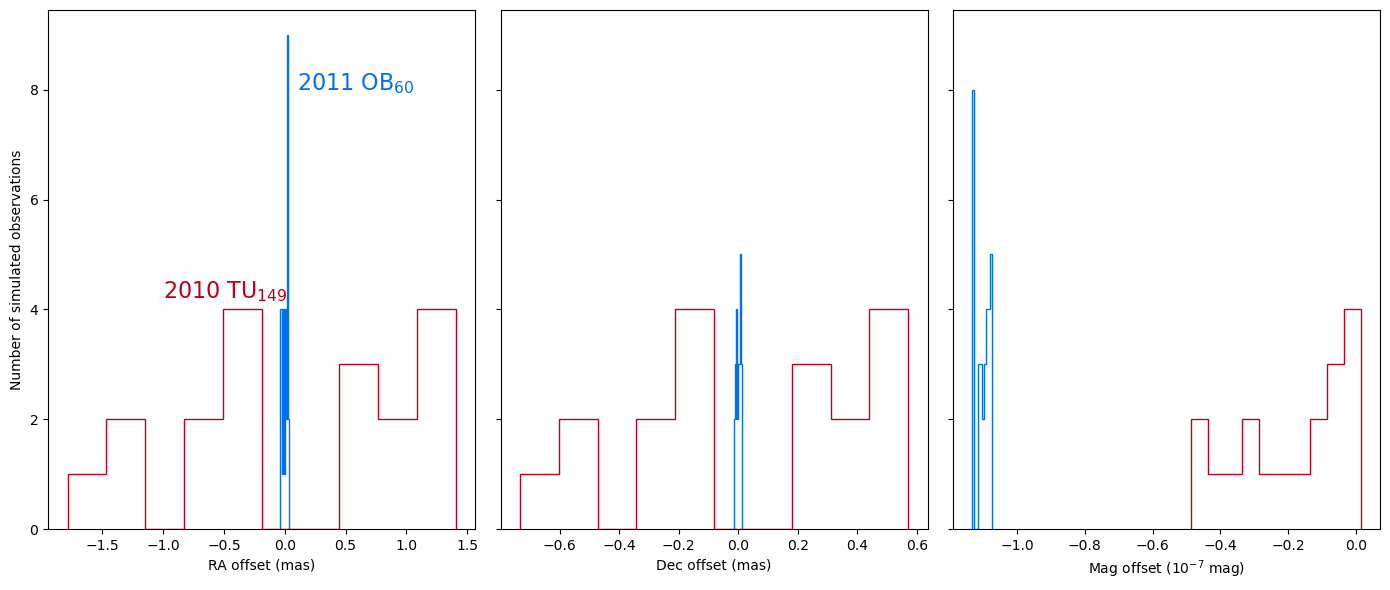

In [18]:
fig, ax = pl.subplots(1,3, sharey=True)
fig.subplots_adjust(wspace=0.2)
ax[0].hist(3600*1000*(v['2011 OB60']['RA_deg'] - insideccd['2011 OB60']['RA_INTERP']), histtype='step', color='xkcd:cerulean blue')
ax[0].hist(3600*1000*(v['2010 TU149']['RA_deg'] - insideccd['2010 TU149']['RA_INTERP']), histtype='step', color='xkcd:scarlet')

ax[0].set_ylabel('Number of simulated observations')
ax[0].set_xlabel(r'RA offset (mas)')

ax[1].hist(3600*1000*(v['2011 OB60']['Dec_deg'] - insideccd['2011 OB60']['DEC_INTERP']), histtype='step',  color='xkcd:cerulean blue')
ax[1].hist(3600*1000*(v['2010 TU149']['Dec_deg'] - insideccd['2010 TU149']['DEC_INTERP']), histtype='step',color='xkcd:scarlet')
ax[1].set_xlabel(r'Dec offset (mas)')

ax[2].hist(1000_0000*(v['2011 OB60']['trailedSourceMag'] - insideccd['2011 OB60']['mag']), histtype='step', color='xkcd:cerulean blue', linestyle='-' )
ax[2].hist(1000_0000*(v['2010 TU149']['trailedSourceMag'] - insideccd['2010 TU149']['mag']), histtype='step', color='xkcd:scarlet',  linestyle='-')
           
ax[2].set_xlabel(r'Mag offset ($10^{-7}$ mag)')

ax[0].text(-1, 4.2, r'2010 TU$_{149}$', fontsize=16, color='xkcd:scarlet')
ax[0].text(0.1, 8, r'2011 OB$_{60}$', fontsize=16, color='xkcd:cerulean blue')

fig.set_size_inches(14,6)
pl.tight_layout()
pl.show()

And see the mean and standard deviation:

In [19]:
pref = {'RA_deg' : 3600*1000, 'Dec_deg' : 3600*1000, 'trailedSourceMag' : 1e7} # note this means mas and 10^-7 mag! 
for i in v:
    for j, k in zip(['RA_deg', 'Dec_deg', 'trailedSourceMag'], ['RA_INTERP', 'DEC_INTERP', 'mag']):
        print(i, j, np.mean(pref[j]*(v[i][j] - insideccd[i][k])), np.std(pref[j]*(v[i][j] - insideccd[i][k])))

2011 OB60 RA_deg 0.0008525950445648078 0.021086587833108447
2011 OB60 Dec_deg 8.785052685311712e-05 0.0075905242490396
2011 OB60 trailedSourceMag -1.1012382783448516 0.019616769792408627
2010 TU149 RA_deg 0.10147533791027286 1.0202124198587195
2010 TU149 Dec_deg 0.024679328869403605 0.4224011685568308
2010 TU149 trailedSourceMag -0.18841977854498915 0.16053158232152698
